In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_in = np.load("a2_data/images.npy")
data_out = np.load("a2_data/labels.npy")

In [3]:
def convert_to_num(hour, minute):
    num = hour+minute/60
    return num

def group(num):
    array = np.zeros(24)
    category = num//0.5
    category = int(category)
    array[category]=1
    return array
    
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [4]:
data_in, data_out = unison_shuffled_copies(data_in, data_out)

In [5]:
class_out = []
for i in range(len(data_out)):
    hour = data_out[i][0]
    minute = data_out[i][1]
    hr_min_num = convert_to_num(hour, minute)
    hr_min_class = group(hr_min_num)
    class_out.append(hr_min_class)
class_out = np.array(class_out)

In [6]:
X_valid, X_train = data_in[15000:]/np.amax(data_in), data_in[:15000]/np.amax(data_in)
y_valid, y_train = class_out[15000:], class_out[:15000]

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu', input_shape=(150,150,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(384, activation='relu'))
model.add(keras.layers.Dense(384, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

Metal device set to: Apple M1


2022-11-11 19:06:28.153862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-11 19:06:28.153972: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.RMSprop(),
             metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size=100, epochs=50, verbose=1, 
                    validation_data=(X_valid, y_valid))

Epoch 1/50


2022-11-11 19:06:29.014303: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-11 19:06:29.354094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - ETA: 0s - loss: 3.1903 - accuracy: 0.0433

2022-11-11 19:07:09.047133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 42s 274ms/step - loss: 3.1903 - accuracy: 0.0433 - val_loss: 3.1785 - val_accuracy: 0.0377
Epoch 2/50
150/150 [==============================] - 43s 288ms/step - loss: 3.1793 - accuracy: 0.0399 - val_loss: 3.1807 - val_accuracy: 0.0377
Epoch 3/50
150/150 [==============================] - 51s 339ms/step - loss: 3.1786 - accuracy: 0.0407 - val_loss: 3.1791 - val_accuracy: 0.0387
Epoch 4/50
150/150 [==============================] - 58s 385ms/step - loss: 3.1129 - accuracy: 0.0574 - val_loss: 2.9205 - val_accuracy: 0.0983
Epoch 5/50
150/150 [==============================] - 58s 388ms/step - loss: 2.5278 - accuracy: 0.1731 - val_loss: 2.3179 - val_accuracy: 0.2247
Epoch 6/50
150/150 [==============================] - 58s 384ms/step - loss: 1.9980 - accuracy: 0.3171 - val_loss: 1.7540 - val_accuracy: 0.3767
Epoch 7/50
150/150 [==============================] - 57s 382ms/step - loss: 1.4797 - accuracy: 0.4829 - val_loss: 1.3111 - val_accuracy: 0.5

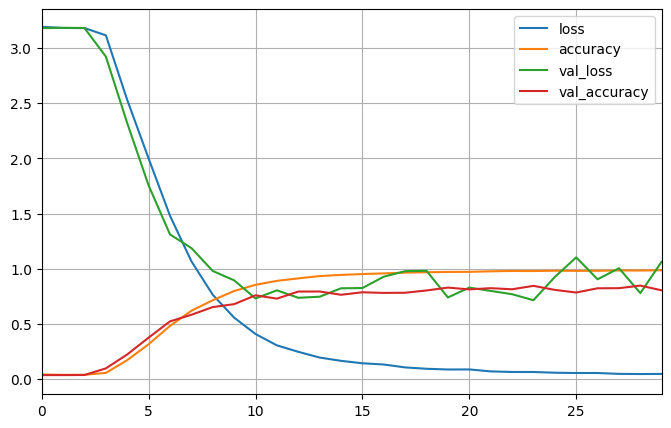

In [10]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.gca().set_xlim(0,29)
plt.show()